Note: I haven't really cleaned up the code yet. As you can see at the end of the notebook, the plot sits a bit high, so I assume there is an issue in the code somewhere -- possibly in the constant values.

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Various constants

In [11]:
# http://pdg.lbl.gov/2014/reviews/rpp2014-rev-astrophysical-constants.pdf
p_crit=4.755e-6
h = 0.6727
T_0 = 2.7255
kb = 8.617333262145e-5

# https://arxiv.org/pdf/1904.10000
N_0 = (2**(7/2))/(3*math.sqrt(math.pi))
Omega_m = (0.1199)/(h**2)
Omega_b = 0.05
p_b = Omega_b*p_crit
Omega_rad=10e-5
upperk = 30

# https://arxiv.org/pdf/1502.01589.pdf
m_p=0.93827231
Y_p=0.75
H0=67.3

# Factors to satisfy units
k_crit_conversionFactor=3.33333333e-6
R_x_conversionFactor=9.258e29

npows = [0]
masses_test = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1.,10.,100.])
sigmas_test = np.logspace(-26,-30,20)

### Critical mass

In [12]:
def M_crit(k_crit):
    return (4*math.pi/3)*Omega_m*p_crit*((math.pi/k_crit)**3)

### Rate of momentum transfer prefactors

In [13]:
# As per Equation 2
def R_x(sigma_0, m_x):
    return N_0*Y_p*p_b*(sigma_0/(m_x+m_p))*((kb*T_0*1e-9)**0.5)*(((1/m_x)+(1/m_p))**0.5)*R_x_conversionFactor

In [14]:
def R_x_prime(sigma_0, m_x):
    return (m_x/(m_p+m_x))*R_x(sigma_0,m_x)

### Zth

In [15]:
# As per Equation 2 + relations in following paragraph + time evolution of scale factor
def z_th(sigma_0,m_x):
    return (H0*np.sqrt(Omega_rad)/R_x_prime(sigma_0, m_x))**(0.6666)

### Zcrit

In [16]:
# As per Equation 1 + relations after Eq. 3
def z_crit(sigma_0,m_x):
    return fsolve(lambda z:((z**4*m_p+((z**3*m_x)*(1+z_th(sigma_0,m_x))))/(1+z_th(sigma_0,m_x)))-\
        (H0*np.sqrt(Omega_rad))/((R_x(sigma_0,m_x))**2),z_th(sigma_0,m_x)/2)

### Kcrit

In [17]:
# As per Equation 4 with appropriate unit conversions
def k_crit(sigma_0,m_x):
    return (2*H0*np.sqrt(Omega_rad)*z_crit(sigma_0,m_x))*(k_crit_conversionFactor)

### Plotting of cross section vs dark matter mass

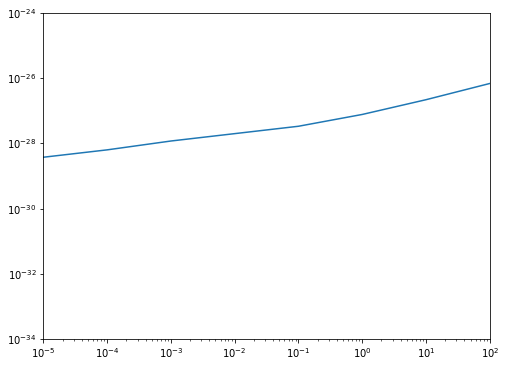

In [18]:
plt.subplots(figsize=(8,6))
sigma = np.zeros(len(masses_test))
sigma_array = np.logspace(-23,-32,200)
for i in range(len(masses_test)):
    sigma[i] = sigma_array[np.argmin(np.abs(k_crit(sigma_array,masses_test[i])-h*upperk))]
    
plt.xlim(masses_test.min(),masses_test.max())
plt.ylim(1e-34,1e-24)
plt.loglog(masses_test,sigma)